In [3]:
#import 
import pandas as pd
import numpy as np
import bz2
import json
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import gc
from scipy.stats import ttest_ind
import seaborn as sns

In [4]:
dfmerged2019 = pd.read_csv('speakerfilter\merged_data_2019.csv.gzip', compression='gzip')

In [11]:
dfmerged2020 = pd.read_csv('speakerfilter\Realmerged_data_2020.csv.gzip', compression='gzip')

In [6]:
dfmerged2018 = pd.read_csv('speakerfilter\merged_data_2018.csv.gzip', compression='gzip')

In [7]:
dfmerged2017 = pd.read_csv('speakerfilter\merged_data_2017.csv.gzip', compression='gzip')

In [8]:
dfmerged2016 = pd.read_csv('speakerfilter\merged_data_2016.csv.gzip', compression='gzip')

In [9]:
dfmerged2015 = pd.read_csv('speakerfilter\merged_data_2015.csv.gzip', compression='gzip')

In [55]:
thirties = [1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939]
fourties = [1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949]

In [59]:
dfmerged2019 = GroupBirthDates(dfmerged2019)

# Functions

In [13]:
def GroupBirthDates(birth):
    birth["date_of_birth"] = birth["date_of_birth"].astype(int)
    birth["date_of_birth"] = birth["date_of_birth"].apply(lambda x: '30s' if x < 1940 else '50s' if x < 1960 else '70s' if x < 1980  else '90s' if x < 2000 else '00s' if x < 2020 else x)
    return birth

In [42]:
def uniondistrib(dfmerged2019):
    fig, axs = plt.subplots(2, 4, sharex=False, sharey=False, tight_layout=True)
    fig.set_figheight(6)
    fig.set_figwidth(12)
    n_bins = 50
    axs[0][0].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Sports']['union_ratio'], bins=n_bins)
    axs[0][1].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Arts']['union_ratio'], bins=n_bins)
    axs[0][2].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Politics']['union_ratio'], bins=n_bins)
    axs[0][3].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Military']['union_ratio'], bins=n_bins)
    axs[1][0].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Religion']['union_ratio'], bins=n_bins)
    axs[1][1].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Other']['union_ratio'], bins=n_bins)
    axs[1][2].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Sciences']['union_ratio'], bins=n_bins)
    axs[1][3].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Business']['union_ratio'], bins=n_bins)
    axs[0][0].set_title('Sports')
    axs[0][1].set_title('Arts')
    axs[0][2].set_title('Politics')
    axs[0][3].set_title('Military')
    axs[1][0].set_title('Religion')
    axs[1][1].set_title('Other')
    axs[1][2].set_title('Sciences')
    axs[1][3].set_title('Business')
    #axs[0].set_xlabel('pronoun_per_word')
    #axs[1].set_xlabel('pronoun_per_word')
    plt.suptitle('Distribution of union_ratio scores')
    plt.show()


In [ ]:
def pronoundistrib(dfmerged2019):
    fig, axs = plt.subplots(2, 4, sharex=False, sharey=False, tight_layout=True)
    fig.set_figheight(6)
    fig.set_figwidth(12)
    n_bins = 50
    axs[0][0].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Sports']['pronoun_per_word'], bins=n_bins)
    axs[0][1].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Arts']['pronoun_per_word'], bins=n_bins)
    axs[0][2].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Politics']['pronoun_per_word'], bins=n_bins)
    axs[0][3].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Military']['pronoun_per_word'], bins=n_bins)
    axs[1][0].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Religion']['pronoun_per_word'], bins=n_bins)
    axs[1][1].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Other']['pronoun_per_word'], bins=n_bins)
    axs[1][2].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Sciences']['pronoun_per_word'], bins=n_bins)
    axs[1][3].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Business']['pronoun_per_word'], bins=n_bins)
    axs[0][0].set_title('Sports')
    axs[0][1].set_title('Arts')
    axs[0][2].set_title('Politics')
    axs[0][3].set_title('Military')
    axs[1][0].set_title('Religion')
    axs[1][1].set_title('Other')
    axs[1][2].set_title('Sciences')
    axs[1][3].set_title('Business')
    #axs[0].set_xlabel('pronoun_per_word')
    #axs[1].set_xlabel('pronoun_per_word')
    plt.suptitle('Distribution of pronouns per word scores')
    plt.show()

In [ ]:
def pronoundistribyear(dfmerged2019):
    fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, tight_layout=True)
    fig.set_figheight(6)
    fig.set_figwidth(12)
    n_bins = 50
    axs[0][0].hist(dfmerged2019.loc[dfmerged2019.date_of_birth == '30s']['union_ratio'], bins=n_bins)
    axs[0][1].hist(dfmerged2019.loc[dfmerged2019.date_of_birth == '50s']['union_ratio'], bins=n_bins)
    axs[1][0].hist(dfmerged2019.loc[dfmerged2019.date_of_birth == '70s']['union_ratio'], bins=n_bins)
    axs[1][1].hist(dfmerged2019.loc[dfmerged2019.date_of_birth == '90s']['union_ratio'], bins=n_bins)
    axs[0][0].set_title('30s')
    axs[0][1].set_title('50s')
    axs[1][0].set_title('70s')
    axs[1][1].set_title('90s')
    plt.suptitle('Distribution of pronoun per word')
    plt.show()

In [14]:
dfmerged2020 = GroupBirthDates(dfmerged2020)
dfmerged2019 = GroupBirthDates(dfmerged2019)
dfmerged2018 = GroupBirthDates(dfmerged2018)
dfmerged2017 = GroupBirthDates(dfmerged2017)
dfmerged2016 = GroupBirthDates(dfmerged2016)
dfmerged2015 = GroupBirthDates(dfmerged2015)

In [22]:
dfmerged2019.drop(['Unnamed: 0', 'qid'], axis=1, inplace=True)

In [23]:
dfmerged2018.drop(['Unnamed: 0', 'qid'], axis=1, inplace=True)
dfmerged2017.drop(['Unnamed: 0', 'qid'], axis=1, inplace=True)
dfmerged2016.drop(['Unnamed: 0', 'qid'], axis=1, inplace=True)
dfmerged2015.drop(['Unnamed: 0', 'qid'], axis=1, inplace=True)

In [20]:
dfmerged2020.columns

Index(['quoteID', 'sentence_count', '._per_sentence', ',_per_sentence',
       '!_per_sentence', '?_per_sentence', ':_per_sentence', ';_per_sentence',
       'sign_per_token', 'punctuation_per_sentence', 'approx_word_count',
       'token_count', 'adj_per_word', 'ordinal_ratio', 'comparative_ratio',
       'superlative_ratio', 'verb_per_word', 'base_ratio', 'pres_ratio',
       'past_ratio', 'pronoun_per_word', 'self_ratio', 'union_ratio',
       'other_ratio', 'sentiment', 'date_of_birth', 'nationality', 'gender',
       'occupation', 'academic_degree', 'religion'],
      dtype='object')

In [ ]:
del dfmerged2020, dfmerged2019, dfmerged2018, dfmerged2017, dfmerged2016, dfmerged2015

# read all df1, df2, df3 contents
dfall = pd.read_csv('file.csv')

In [25]:
dfmerged2020 = pd.concat([dfmerged2020,dfmerged2019])

In [26]:
del dfmerged2019

In [28]:
dfmerged2020 = pd.concat([dfmerged2020,dfmerged2018])

In [29]:
del dfmerged2018

In [31]:
dfmerged2020 = pd.concat([dfmerged2020,dfmerged2017])

In [32]:
del dfmerged2017

In [33]:
dfmerged2020 = pd.concat([dfmerged2020,dfmerged2016])

In [34]:
del dfmerged2016

In [35]:
dfmerged2020 = pd.concat([dfmerged2020,dfmerged2015])

In [36]:
del dfmerged2015

# 2019

In [38]:
dfmerged2020.to_csv(r"C:\Users\rapha\OneDrive\Bureau\Master3\ADA\Project\Quotes\UniqueSpeakers\speakerfilter\merged_data_all.csv.gzip", header=True, index=True, compression="gzip")

In [39]:
len(dfmerged2020)

47779271

## Occupation-Union_Ratio

<AxesSubplot:xlabel='occupation', ylabel='union_ratio'>

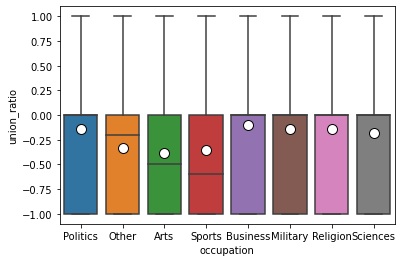

In [40]:
sns.boxplot(x='occupation', y='union_ratio', data=dfmerged2020, order=None,showmeans=True,
meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})

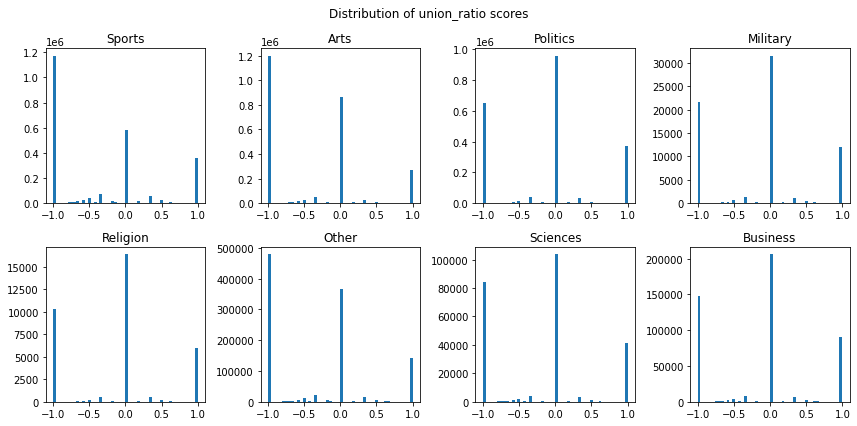

In [48]:
fig, axs = plt.subplots(2, 4, sharex=False, sharey=False, tight_layout=True)
fig.set_figheight(6)
fig.set_figwidth(12)
n_bins = 50
axs[0][0].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Sports']['union_ratio'], bins=n_bins)
axs[0][1].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Arts']['union_ratio'], bins=n_bins)
axs[0][2].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Politics']['union_ratio'], bins=n_bins)
axs[0][3].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Military']['union_ratio'], bins=n_bins)
axs[1][0].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Religion']['union_ratio'], bins=n_bins)
axs[1][1].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Other']['union_ratio'], bins=n_bins)
axs[1][2].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Sciences']['union_ratio'], bins=n_bins)
axs[1][3].hist(dfmerged2019.loc[dfmerged2019.occupation == 'Business']['union_ratio'], bins=n_bins)
axs[0][0].set_title('Sports')
axs[0][1].set_title('Arts')
axs[0][2].set_title('Politics')
axs[0][3].set_title('Military')
axs[1][0].set_title('Religion')
axs[1][1].set_title('Other')
axs[1][2].set_title('Sciences')
axs[1][3].set_title('Business')
#axs[0].set_xlabel('pronoun_per_word')
#axs[1].set_xlabel('pronoun_per_word')
plt.suptitle('Distribution of union_ratio scores')
plt.show()

In [43]:
uniondistrib(dfmerged2020)

MemoryError: Unable to allocate 7.48 GiB for an array with shape (21, 47779271) and data type float64

Error in callback <function flush_figures at 0x00000130BD79E0D0> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:xlabel='occupation', ylabel='pronoun_per_word'>

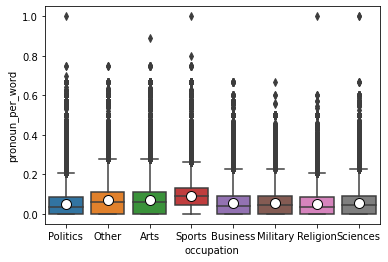

In [45]:
sns.boxplot(x='occupation', y='pronoun_per_word', data=dfmerged2020, order=None,showmeans=True,
meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})

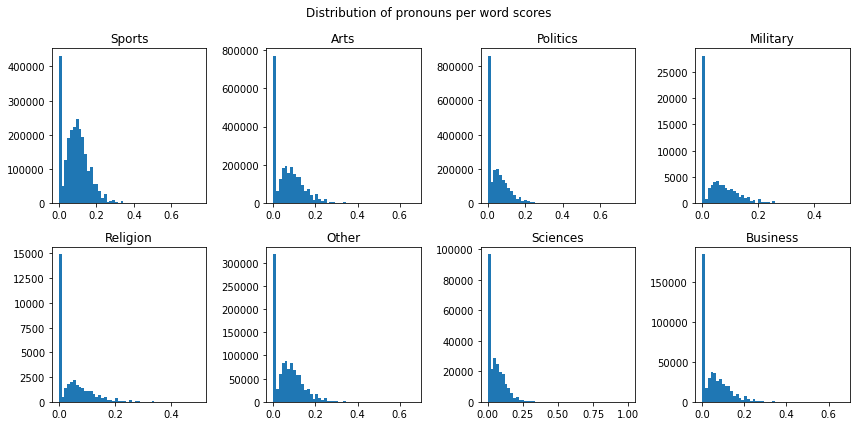

In [95]:
pronoundistrib(dfmerged2019)

<AxesSubplot:xlabel='date_of_birth', ylabel='pronoun_per_word'>

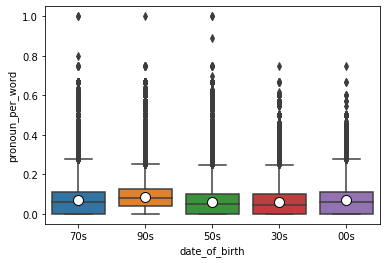

In [46]:
sns.boxplot(x='date_of_birth', y='pronoun_per_word', data=dfmerged2020, order=None,showmeans=True,
meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})

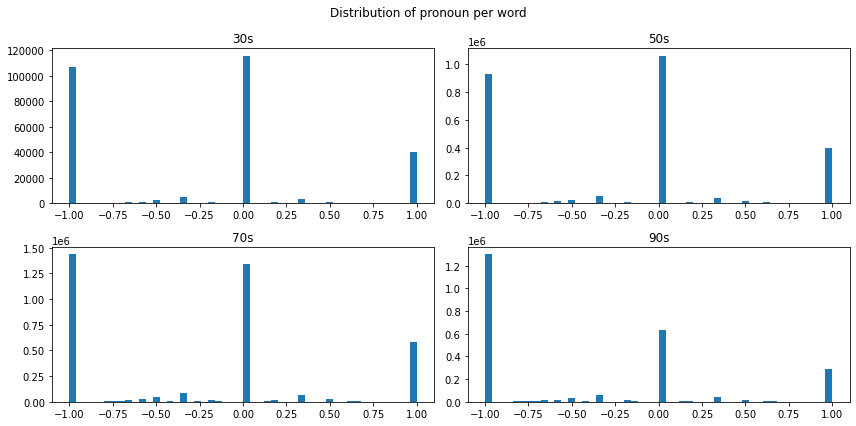

In [99]:
pronoundistribyear(dfmerged2019)

<AxesSubplot:xlabel='date_of_birth', ylabel='union_ratio'>

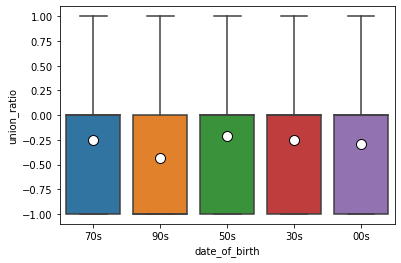

In [49]:
sns.boxplot(x='date_of_birth', y='union_ratio', data=dfmerged2020, order=None,showmeans=True,
meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})

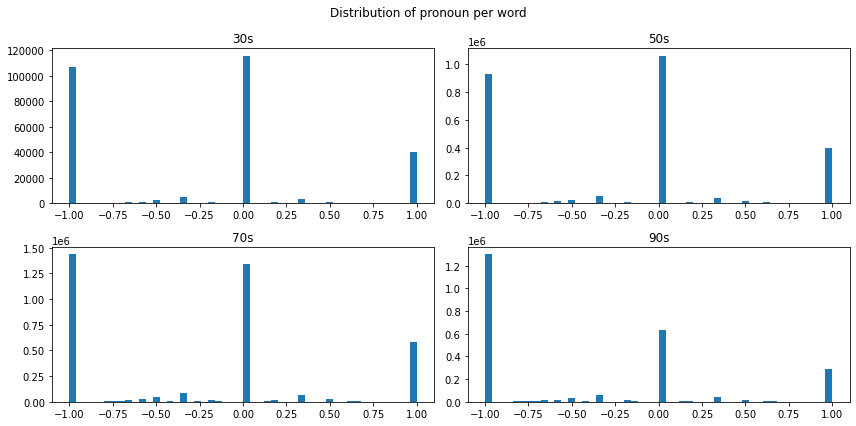

In [97]:
fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, tight_layout=True)
fig.set_figheight(6)
fig.set_figwidth(12)
n_bins = 50
axs[0][0].hist(dfmerged2019.loc[dfmerged2019.date_of_birth == '30s']['union_ratio'], bins=n_bins)
axs[0][1].hist(dfmerged2019.loc[dfmerged2019.date_of_birth == '50s']['union_ratio'], bins=n_bins)
axs[1][0].hist(dfmerged2019.loc[dfmerged2019.date_of_birth == '70s']['union_ratio'], bins=n_bins)
axs[1][1].hist(dfmerged2019.loc[dfmerged2019.date_of_birth == '90s']['union_ratio'], bins=n_bins)
axs[0][0].set_title('30s')
axs[0][1].set_title('50s')
axs[1][0].set_title('70s')
axs[1][1].set_title('90s')
plt.suptitle('Distribution of pronoun per word')
plt.show()

<AxesSubplot:xlabel='gender', ylabel='other_ratio'>

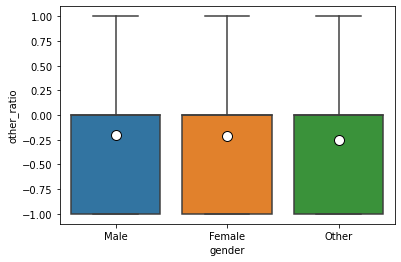

In [47]:
sns.boxplot(x='gender', y='other_ratio', data=dfmerged2020, order=None,showmeans=True,
meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})

<AxesSubplot:xlabel='gender', ylabel='self_ratio'>

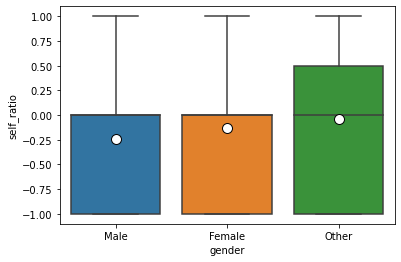

In [48]:
sns.boxplot(x='gender', y='self_ratio', data=dfmerged2020, order=None,showmeans=True,
meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})